## CA1_MachineLearning_HDip - A Machine Learning Approach for Alzheimer's Disease Prediction

Student Full Name: **Thant Thiha** <br>
Student Number: **2025178** <br>
Module Title: **Machine Learning - HDip DAB 2025 Feb** <br>
Assessment Title : **CA1 - Machine Learning** <br>
Assessment Due Date: 20 April 2025 <br>
Date of Submission: 18 April 2025

## Introduction
Alzheimer's disease is a progressive neurological disorder that affects millions worldwide causing memory loss and cognitive decline. Early detection for such kind of disease is critical for intervention and treatment planning. To address this, machine learning can potentially identify subtle patterns in patient data that might not be immediately apparent to clinicians.

In this report, we'll follow the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** methodology to develop classification models that can predict Alzheimer's disease status based on various clinical and biomarker features of the patients. We'll also explore data characteristics, preprocess the data, build multiple machine learning models, tune their hyperparameters and evaluate their performance.

## 1. Business Understanding

### 1.1 Problem Statement

Alzheimer's disease is often diagnosed at later stages when cognitive symptoms become more pronounced but by then significant neurological damage has already occurred. Medical professionals rely on various clinical assessments, cognitive tests and biomarkers to diagnose Alzheimer's but these methods can be subjective and may not always provide a definitive diagnosis.

However, machine learning techniques may offer promising approaches to integrate multiple patient data points for more objective and accurate classification of Alzheimer's disease. By identifying patterns in patient data that we can't easily see by our eyes that correlate with disease status, we can develop models to assist in early detection and diagnosis.

### 1.2 Objectives

Using the `Alzheimer's disease dataset`, develop machine learning classification models to predict patient diagnosis based on demographic, lifestyle and clinical variables.

- Identify the most influential features for predicting Alzheimer's diagnosis
- Develop and Compare different multiple classification algorithms (`Random Forest`, `Decision Tree` and GradientBoosting (`XGBoost`))
- Assess model generalization across different age groups and ethnicities
- Provide insights into the relationship between various patient characteristics and Alzheimer's risk

## 2. Data Understanding

In this section, we'll explore the dataset to understand its structure, characteristics, and relationships between variables. This exploration will inform our preprocessing and modeling strategies.

### 2.1 Dataset Characteristics

This `alzheimers_disease_data.csv` dataset contains extensive health information for **2,149 patients**, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes patient information such as demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms and a binary `Diagnosis` of Alzheimer's Disease (0 = Negative, 1 = Positive) as target variable as follows. Additionally, this dataset is synthetic and was generated for educational purposes and owned by Rabie El Kharoua on [Kaggle](https://www.kaggle.com/dsv/8668279).

#### Patient ID

-   `PatientID`: A unique identifier assigned to each patient (4751 to 6900).

#### Demographic Details

-   `Age`: The age of the patients ranges from 60 to 90 years.
-   `Gender`: Gender of the patients, where 0 represents Male and 1 represents Female.
-   `Ethnicity`: The ethnicity of the patients, coded as follows:
    -   0: Caucasian
    -   1: African American
    -   2: Asian
    -   3: Other
-   `EducationLevel`: The education level of the patients, coded as follows:
    -   0: None
    -   1: High School
    -   2: Bachelor's
    -   3: Higher

#### Lifestyle Factors

-   `BMI`: Body Mass Index of the patients, ranging from 15 to 40.
-   `Smoking`: Smoking status, where 0 indicates No and 1 indicates Yes.
-   `AlcoholConsumption`: Weekly alcohol consumption in units, ranging from 0 to 20.
-   `PhysicalActivity`: Weekly physical activity in hours, ranging from 0 to 10.
-   `DietQuality`: Diet quality score, ranging from 0 to 10.
-   `SleepQuality`: Sleep quality score, ranging from 4 to 10.

#### Medical History

-   `FamilyHistoryAlzheimers`: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
-   `CardiovascularDisease`: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
-   `Diabetes`: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
-   `Depression`: Presence of depression, where 0 indicates No and 1 indicates Yes.
-   `HeadInjury`: History of head injury, where 0 indicates No and 1 indicates Yes.
-   `Hypertension`: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

#### Clinical Measurements

-   `SystolicBP`: Systolic blood pressure, ranging from 90 to 180 mmHg.
-   `DiastolicBP`: Diastolic blood pressure, ranging from 60 to 120 mmHg.
-   `CholesterolTotal`: Total cholesterol levels, ranging from 150 to 300 mg/dL.
-   `CholesterolLDL`: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
-   `CholesterolHDL`: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
-   `CholesterolTriglycerides`: Triglycerides levels, ranging from 50 to 400 mg/dL.

#### Cognitive and Functional Assessments

-   `MMSE`: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
-   `FunctionalAssessment`: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
-   `MemoryComplaints`: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
-   `BehavioralProblems`: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
-   `ADL`: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

#### Symptoms

-   `Confusion`: Presence of confusion, where 0 indicates No and 1 indicates Yes.
-   `Disorientation`: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
-   `PersonalityChanges`: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
-   `DifficultyCompletingTasks`: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
-   `Forgetfulness`: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

#### Diagnosis Information

-   `Diagnosis`: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

### 2.2 Loading Data and Inspecting
#### 2.2.1 Data Import

In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

`Pandas` is used to load the `alzheimers_disease_data.csv` dataset and store it as `df` Dataframe.

#### 2.2.2 Load dataset

In [16]:
# Import dataset
df = pd.read_csv("alzheimers_disease_data.csv")

# View the top 10 rows
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


#### 2.2.3 Gather Descriptive Stats about the data

In [18]:
# View the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


#### 2.2.4 Gather basic information of the data

In [2]:
# View the overview of data and missing values
df.info()

NameError: name 'df' is not defined

#### 2.2.5 Check missing values

In [22]:
# Check missing values
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

#### 2.2.6 Check for duplicates

In [24]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

#### 2.2.7 Removing Unnecessary columns

In [26]:
# Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
df.shape

(2149, 33)

There are 2,149 observations and 33 variables in the dataset after dropping unnecessary columns `PatientID` and `DoctorInCharge`. No missing values and duplicates are found.

### 2.3 Understanding Target Variable
The target variable for our prediction is the `Diagnosis` column which indicates whether a patient has Alzheimer's disease.

Diagnosis distribution (%):
Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


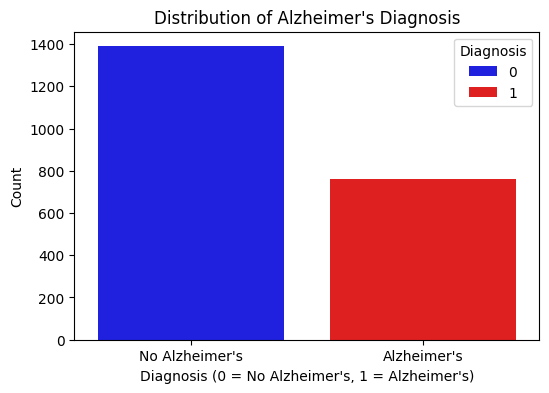

In [29]:
# Check distribution of the target variable
diagnosis_distribution = df['Diagnosis'].value_counts(normalize=True) * 100
print("Diagnosis distribution (%):")
print(diagnosis_distribution)

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df, hue='Diagnosis', palette=['blue', 'red'])
plt.title('Distribution of Alzheimer\'s Diagnosis')
plt.xlabel('Diagnosis (0 = No Alzheimer\'s, 1 = Alzheimer\'s)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Alzheimer\'s'])
plt.show()

We can see there is a slight class imbalance with approximately 35% positive and 65% negative.

### 2.4 Health-related variables
Next, let's look at the distribution of health-related variables and their relationship with the diagnosis.

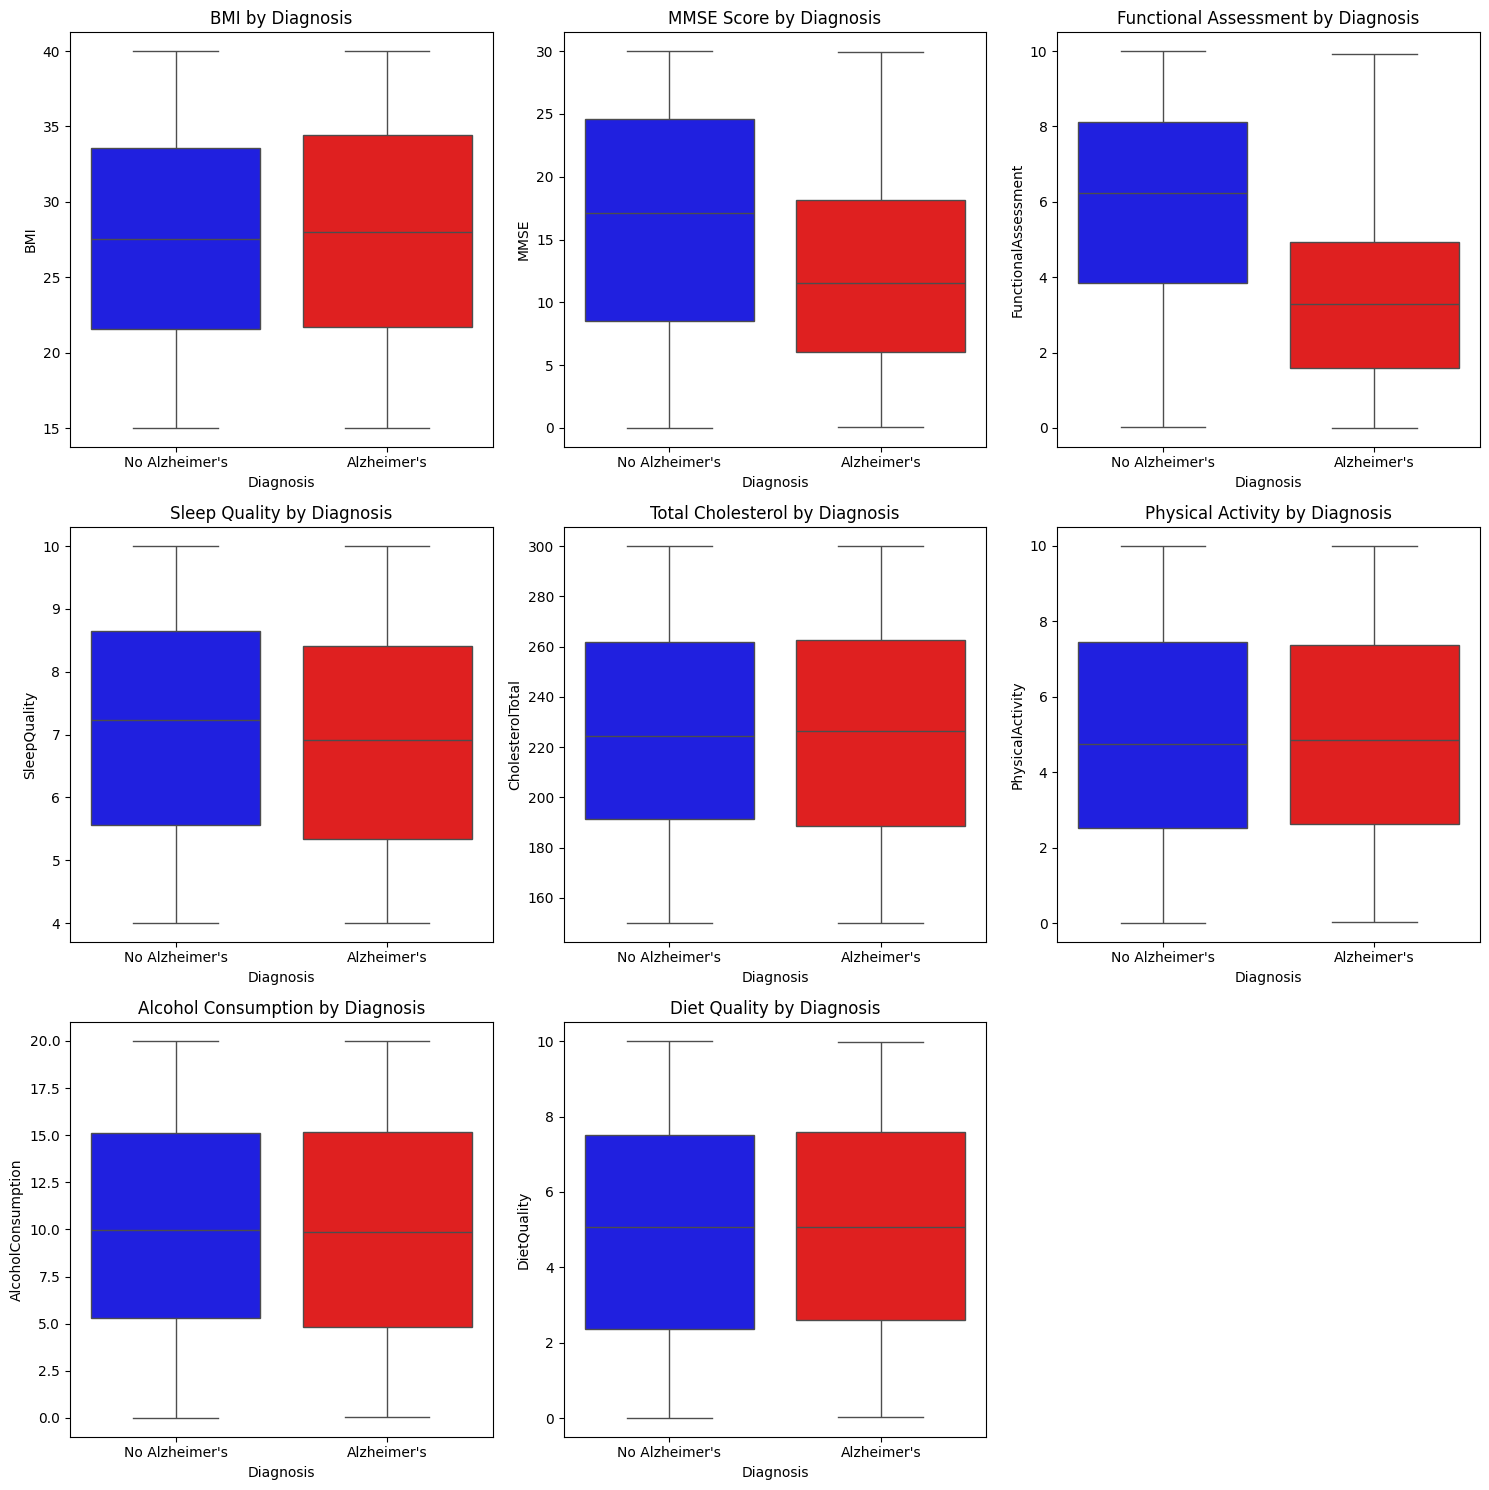

In [32]:
# Distribution of key health metrics by diagnosis
plt.figure(figsize=(15, 15))

# BMI
plt.subplot(3, 3, 1)
sns.boxplot(x='Diagnosis', y='BMI', data=df, palette=['blue', 'red'])
plt.title('BMI by Diagnosis')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Alzheimer\'s'])

# MMSE (Mini-Mental State Examination)
plt.subplot(3, 3, 2)
sns.boxplot(x='Diagnosis', y='MMSE', data=df, palette=['blue', 'red'])
plt.title('MMSE Score by Diagnosis')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Alzheimer\'s'])

# Functional Assessment
plt.subplot(3, 3, 3)
sns.boxplot(x='Diagnosis', y='FunctionalAssessment', data=df, palette=['blue', 'red'])
plt.title('Functional Assessment by Diagnosis')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Alzheimer\'s'])

# Sleep Quality
plt.subplot(3, 3, 4)
sns.boxplot(x='Diagnosis', y='SleepQuality', data=df, palette=['blue', 'red'])
plt.title('Sleep Quality by Diagnosis')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Alzheimer\'s'])

# Cholesterol Total
plt.subplot(3, 3, 5)
sns.boxplot(x='Diagnosis', y='CholesterolTotal', data=df, palette=['blue', 'red'])
plt.title('Total Cholesterol by Diagnosis')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Alzheimer\'s'])

# Physical Activity
plt.subplot(3, 3, 6)
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df, palette=['blue', 'red'])
plt.title('Physical Activity by Diagnosis')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Alzheimer\'s'])

# Alcohol Consumption
plt.subplot(3, 3, 7)
sns.boxplot(x='Diagnosis', y='AlcoholConsumption', data=df, palette=['blue', 'red'])
plt.title('Alcohol Consumption by Diagnosis')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Alzheimer\'s'])

# Diet Quality
plt.subplot(3, 3, 8)
sns.boxplot(x='Diagnosis', y='DietQuality', data=df, palette=['blue', 'red'])
plt.title('Diet Quality by Diagnosis')
plt.xticks([0, 1], ['No Alzheimer\'s', 'Alzheimer\'s'])

plt.tight_layout()
plt.show()

#### Exploring Correlation

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

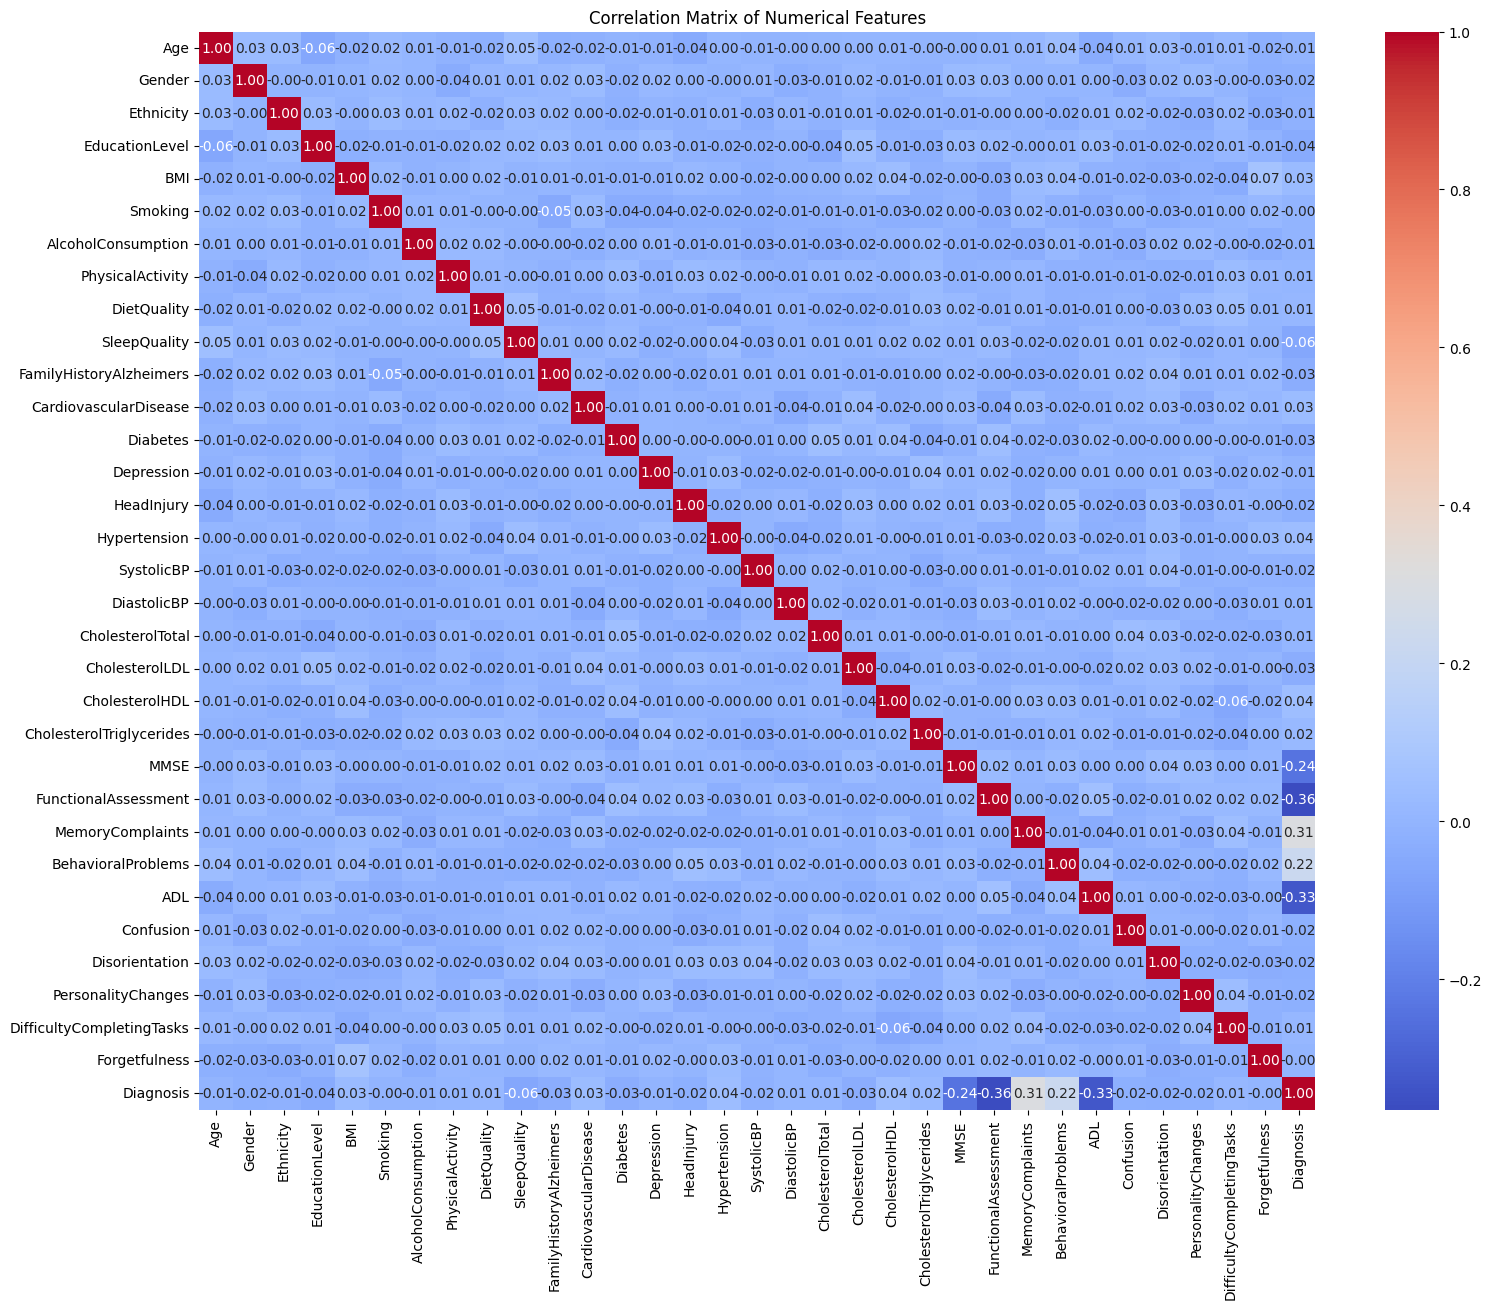

In [34]:
# Correlation analysis
plt.figure(figsize=(18, 14))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')

The heatmap shows that there are no strong correlations among themselves. However, 5 columns show correlation with our target variable `Diagnosis`.

3 numerical features `FunctionalAssessment`, `ADL(Activities of Daily Living)` and `MMSE(Mini-Mental State Exam)` are negatively correlated with -0.36, -0.33 and -0.24 respectively with `Diagnosis`. It means that lower scores in these assessments are associated with higher likeihood of diagnosis.

Furthermore, 2 categorial features `BehavioralProblems` and `MemoryComplaints` are positively correlated with 0.22 and 0.30 respectively to `Diagnosis` meaning the presence of these issues is related with higher probability of diagnosis.

#### Exploring Distribution of Categorical and Continuous Features

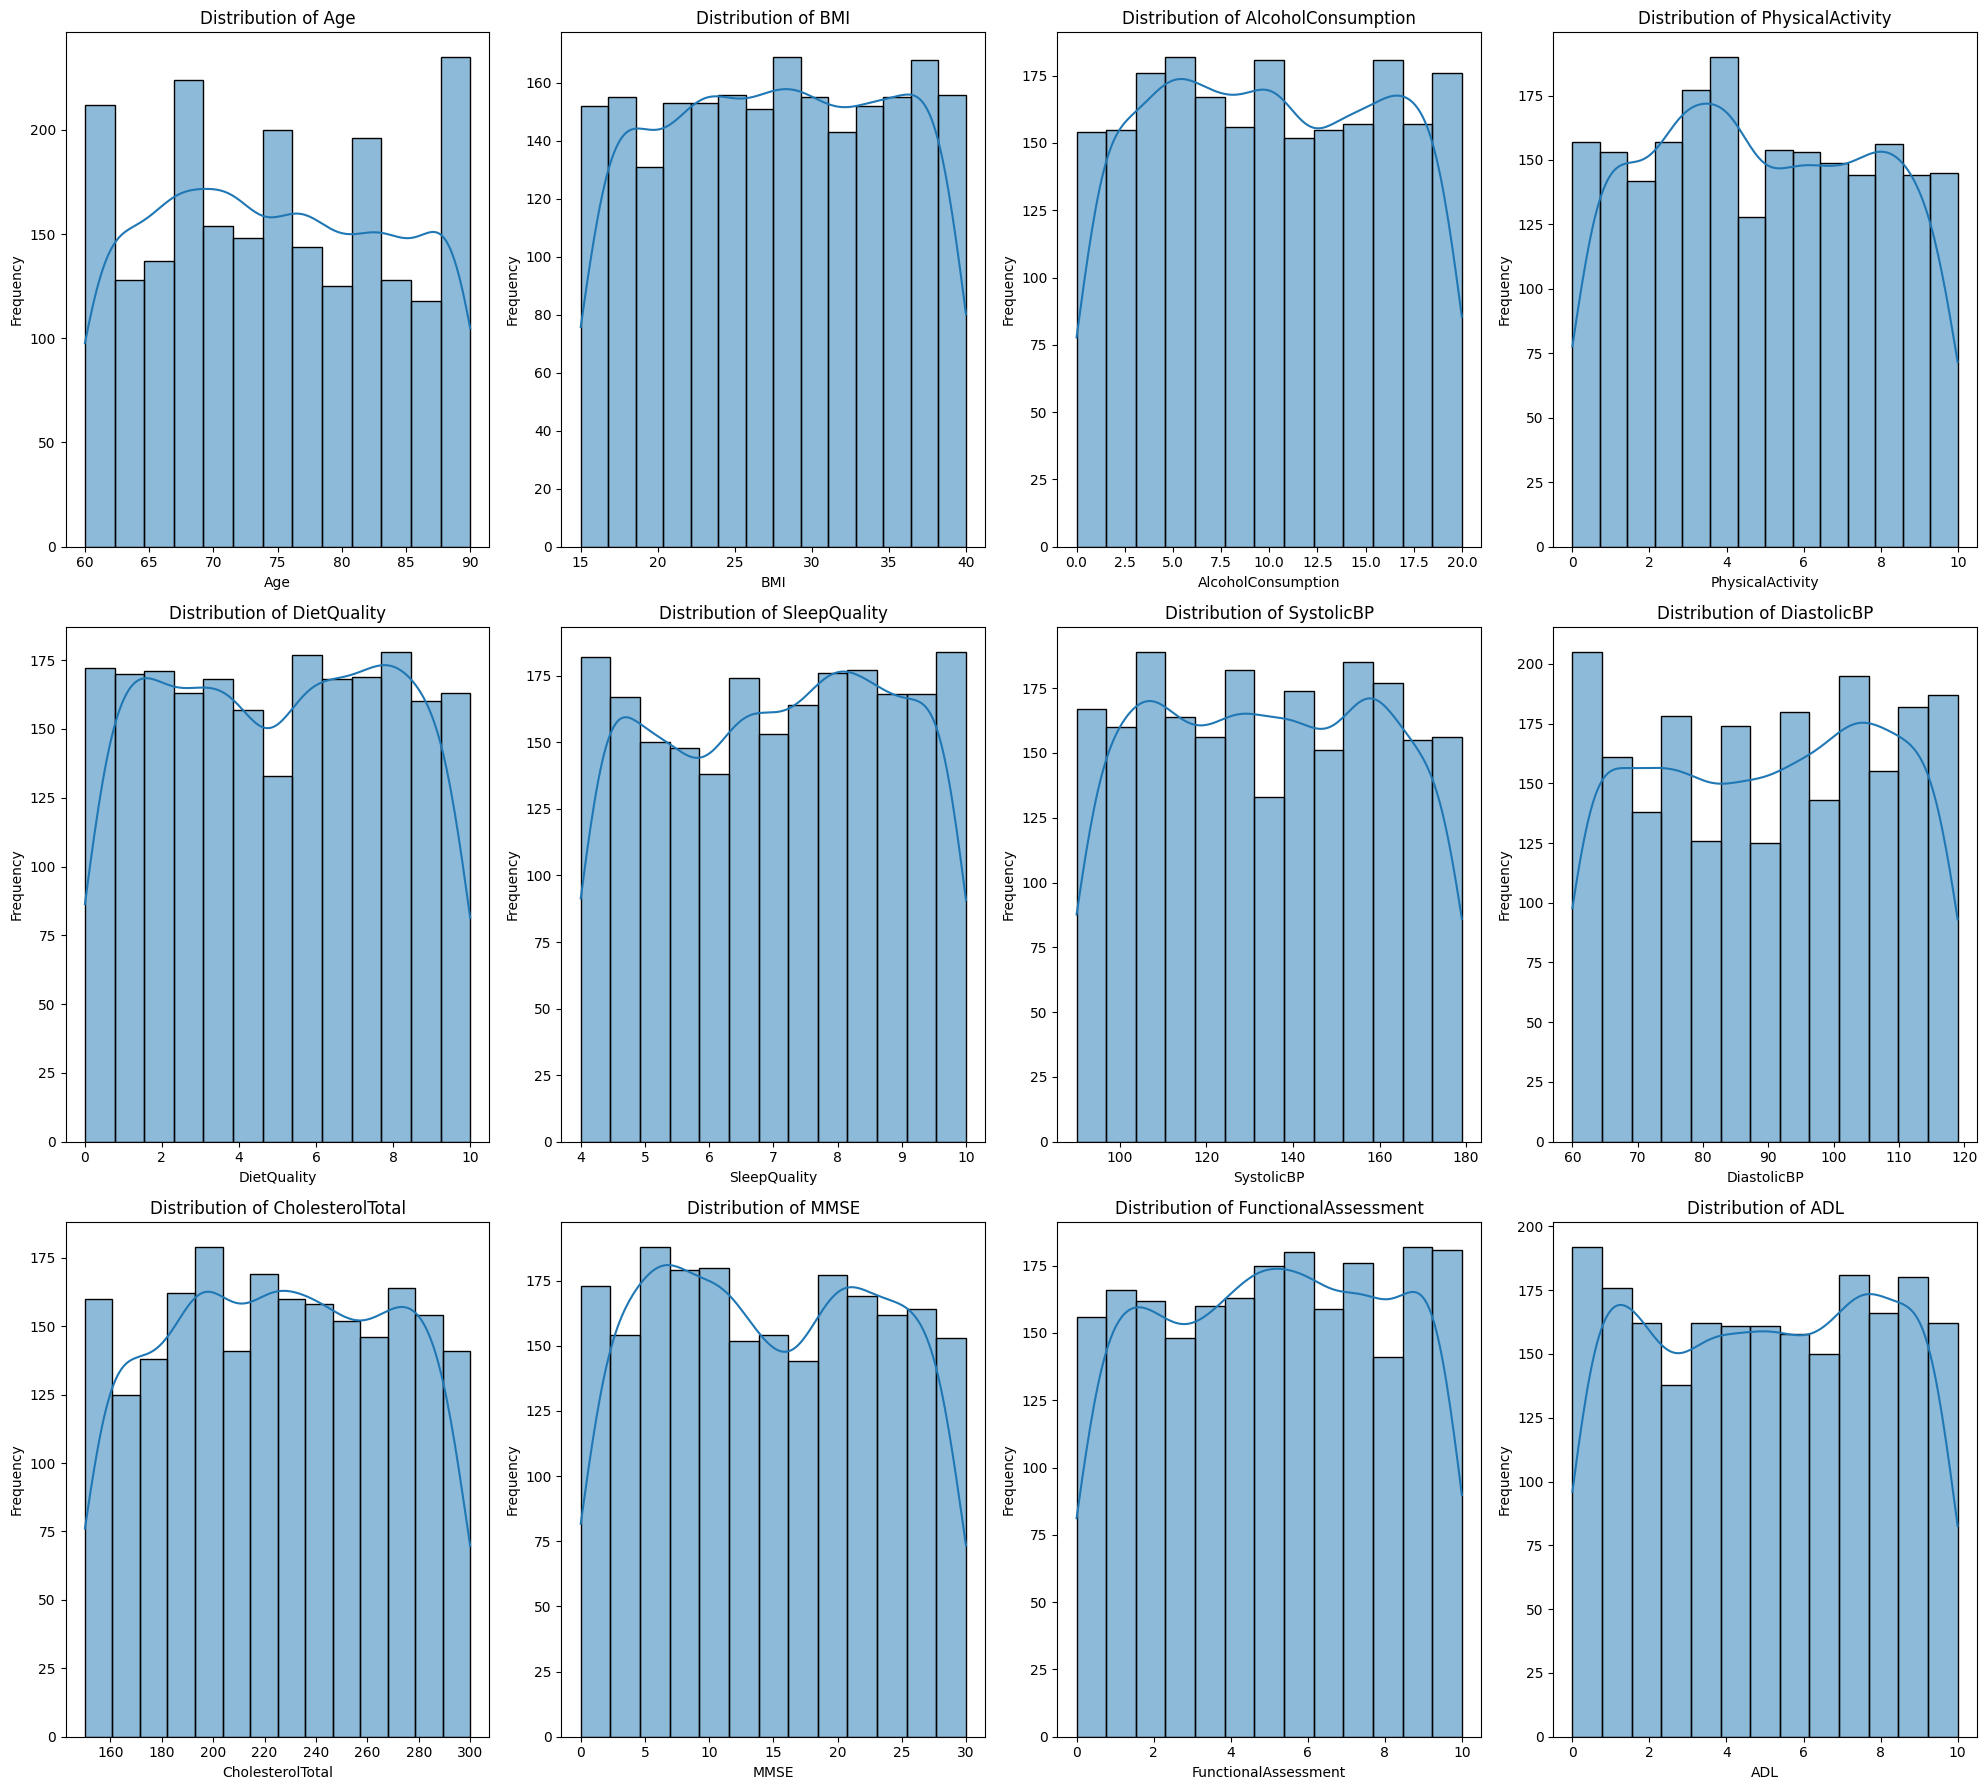

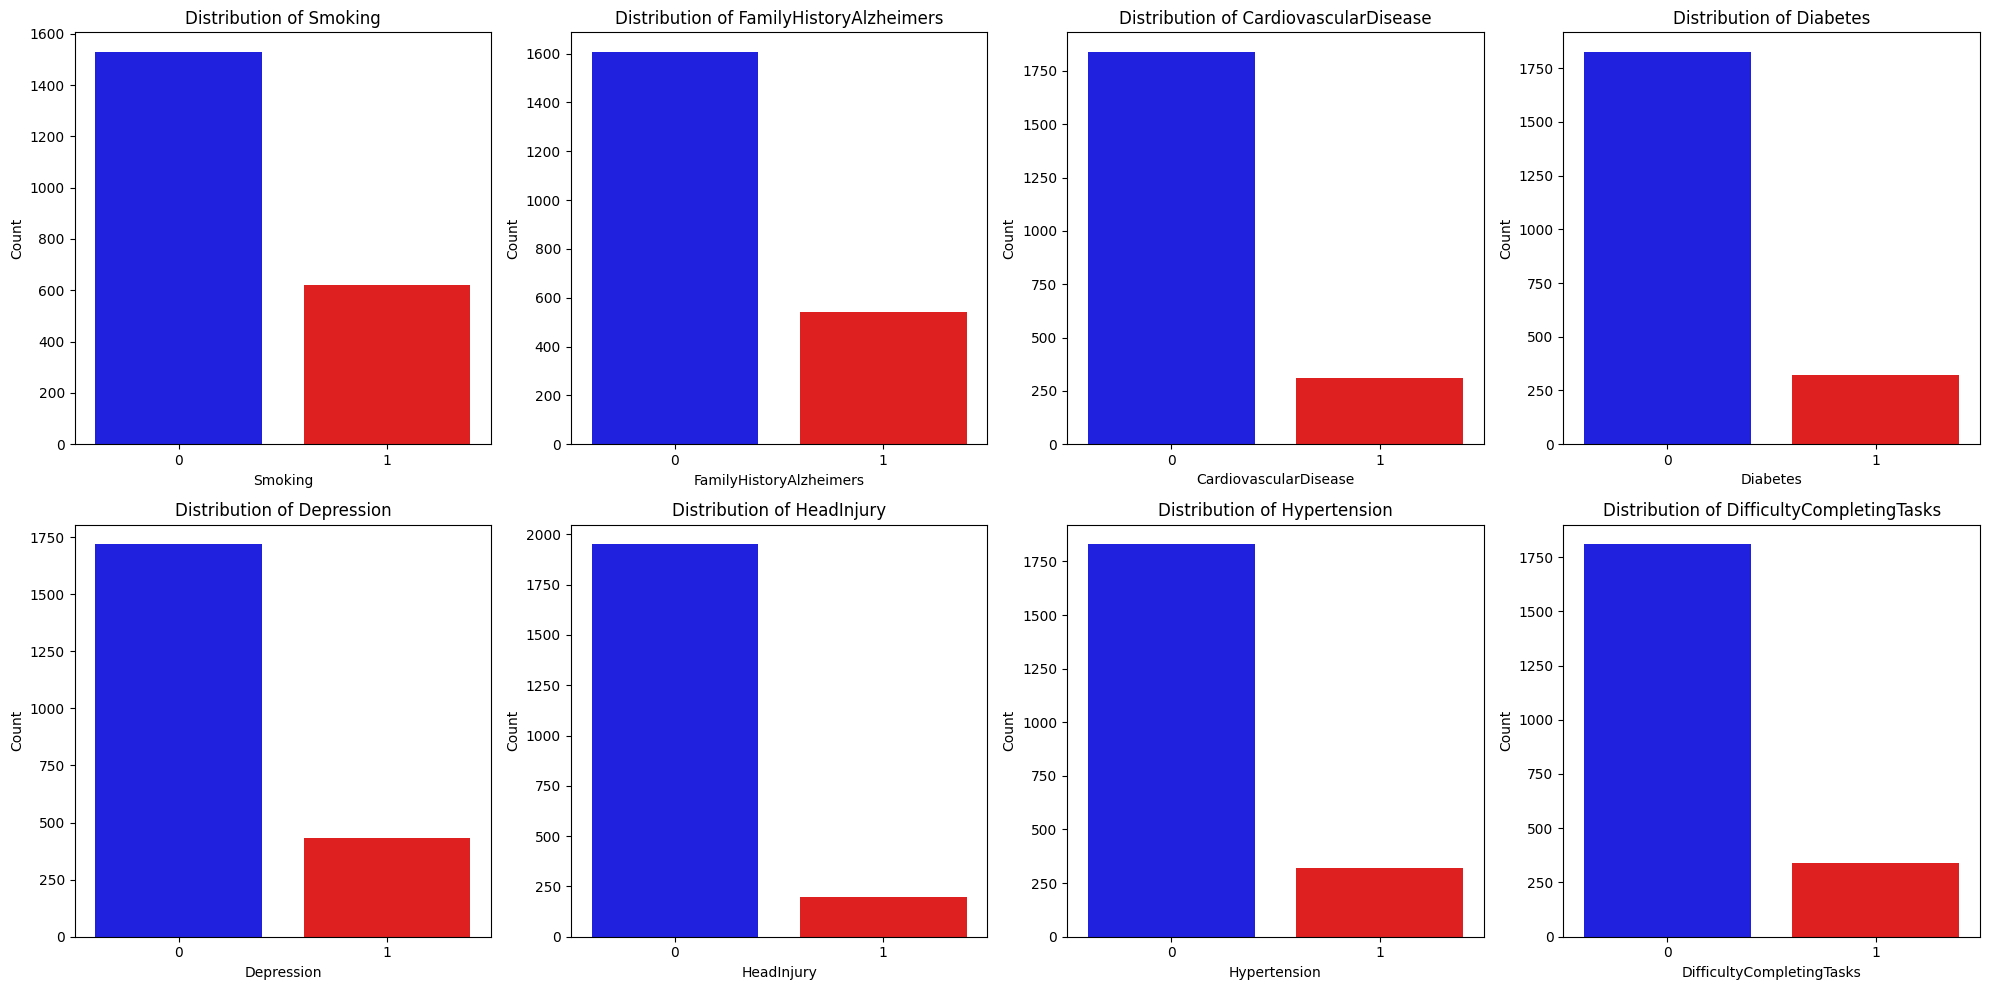

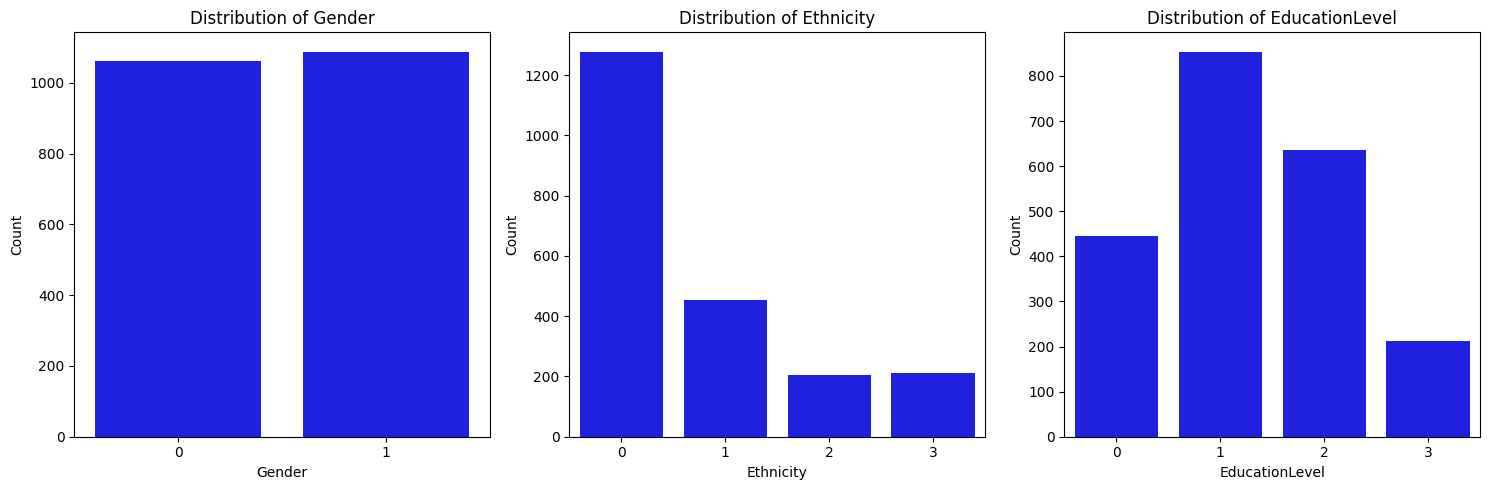

In [37]:
# Continuous Variables
continuous_vars = [
    'Age',
    'BMI',
    'AlcoholConsumption',
    'PhysicalActivity',
    'DietQuality',
    'SleepQuality',
    'SystolicBP',
    'DiastolicBP',
    'CholesterolTotal',
    'MMSE',
    'FunctionalAssessment',
    'ADL'
]

# Plot distributions for continuous variables
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 18))
for i, var in enumerate(continuous_vars):
    ax = axes[i // 4, i % 4]
    sns.histplot(df[var], kde=True, ax=ax, palette=['blue'])
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Categorical Variables
categorical_vars = [
    'Smoking',
    'FamilyHistoryAlzheimers',
    'CardiovascularDisease',
    'Diabetes',
    'Depression',
    'HeadInjury',
    'Hypertension',
    'DifficultyCompletingTasks'
]

# Plot distributions for categorical variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, var in enumerate(categorical_vars):
    ax = axes[i // 4, i % 4]
    sns.countplot(x=var, data=df, ax=ax, palette=['blue', 'red'])
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Gender and Ethnicity
categorical_vars_extra = ['Gender', 'Ethnicity', 'EducationLevel']

# Plot distributions for extra categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, var in enumerate(categorical_vars_extra):
    ax = axes[i]
    sns.countplot(x=var, data=df, ax=ax, palette=['blue'])
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.savefig('distribution.jpg', format='jpeg', dpi=300)
plt.show()

### 2.7 Key Findings
Based on our exploratory data analysis, we can make the following observations.

**Demographic Patterns**: 
- The dataset contains patients with age predominantly in the range of 60-90 years
- Most of the individuals do not have disease or health problems
- There appears to be a roughly equal distribution of male and female patients
- Representation across 4 different ethnicities and education levels is present in the dataset

**Health Indicators**:

- `ADL` and `MMSE` scores show a clear difference between patients with and without Alzheimer's
- `Functional Assessment` scores also appear to differ significantly between diagnostic groups
- Some health metrics like sleep quality and physical activity show potential relationships with diagnosis

**Data Quality**:

- There are only a few outliers in various clinical measurements that may need to be addressed
- There are no null values and duplicates in the dataset
- The dataset appears to be relatively balanced in terms of the target variable distribution

These findings will inform our feature selection, preprocessing strategies and modeling approaches in the next sections.

## 3. Data Preprocessing

#### 3.1 Split into 3 Training and Test sets of 5%, 10% and 20% Test
Split the data into 3 sets as follows and stratify the data so that class distributions is consistent across train/test sets. We use this method so that the model that performs well across different splits is likely to be more robust.

- 95% training and 5% test
- 90% training and 10% test
- 80% training and 20% test

**Note**: As the models we are going to use are tree-based models which are resistant to outliers and handle unscaled features well, we do not need to standardize the data in this step.

In [41]:
# Split data into features and target
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

# Create 3 different train-test splits with varying test sizes
test_sizes = [0.05, 0.10, 0.20]  # 5%, 10%, and 20% test sizes
splits = []

for i, test_size in enumerate(test_sizes):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify = y, random_state=10
    )
    
    splits.append({
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'split_id': i+1,
        'test_size': test_size
    })

### 3.2 Conduct Stratified 5-fold cross-validation of baseline model with 3 splits
First, we will try fitting Random Forest with its default parameters to see how the results looks like for 3 splits.

In [43]:
# Perform cross-validation on each split using Random Forest as baseline
baseline_model = RandomForestClassifier(random_state=10)
cv_results = []

for split in splits:
    # Define cross-validation with 5-fold stratified
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    
    # Perform cross-validation
    cv_scores = cross_val_score(
        baseline_model, 
        split['X_train'], 
        split['y_train'],
        cv=kf,
        scoring='accuracy'
    )
    
    # Store results
    cv_results.append({
        'split_id': split['split_id'],
        'test_size': split['test_size'],
        'cv_scores': cv_scores,
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std(),
        'train_size': len(split['X_train'])
    })

    print(f"Split {split['split_id']} (Test Size: {split['test_size']*100}%):")
    print(f"  Train samples: {len(split['X_train'])}, Test samples: {len(split['X_test'])}")
    print(f"  CV Scores: {cv_scores}")
    print(f"  Mean CV Score: {cv_scores.mean():.4f}")
    print(f"  Std CV Score: {cv_scores.std():.4f}")
    print()

Split 1 (Test Size: 5.0%):
  Train samples: 2041, Test samples: 108
  CV Scores: [0.9608802  0.93137255 0.94362745 0.92892157 0.92401961]
  Mean CV Score: 0.9378
  Std CV Score: 0.0132

Split 2 (Test Size: 10.0%):
  Train samples: 1934, Test samples: 215
  CV Scores: [0.94573643 0.9379845  0.9379845  0.94315245 0.94041451]
  Mean CV Score: 0.9411
  Std CV Score: 0.0030

Split 3 (Test Size: 20.0%):
  Train samples: 1719, Test samples: 430
  CV Scores: [0.93023256 0.94476744 0.93895349 0.94767442 0.92419825]
  Mean CV Score: 0.9372
  Std CV Score: 0.0088



In [44]:
# Find the best performing split based on cross-validation results
best_split_idx = np.argmax([result['mean_cv_score'] for result in cv_results])
best_split = splits[best_split_idx]
best_cv_result = cv_results[best_split_idx]

print(f"Best Split: {best_split['split_id']} with Test Size: {best_split['test_size']*100}%")
print(f"Mean CV Score: {best_cv_result['mean_cv_score']:.4f}")

Best Split: 2 with Test Size: 10.0%
Mean CV Score: 0.9411


According to the stratified cross-validation results, the best performing split is test 10% and train 90% with mean accuracy score of 94.1%. This model generalizes well to the different train set sizes and we will use this split set for further testing with holdout set.

## 4. Modeling

### 4.1 Test the best split of 10% with holdout set to get baseline accuracy

Next, we will test the best split with the actual test holdout set to compare the results.

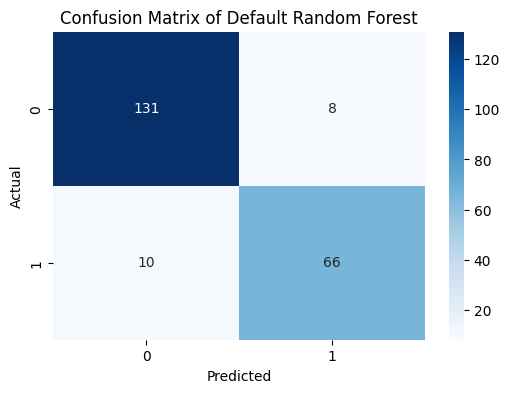

Baseline Accuracy of the model 10% test size is 0.916


In [47]:
baseline_model.fit(best_split['X_train'], best_split['y_train'])
baseline_pred = baseline_model.predict(best_split['X_test'])
baseline_accuracy = accuracy_score(best_split['y_test'], baseline_pred)

# Baseline accuracy
baseline_accuracy = accuracy_score(best_split['y_test'], baseline_pred)
# Compute confusion matrix
conf_matrix = confusion_matrix(best_split['y_test'], baseline_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Default Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Baseline Accuracy of the model 10% test size is {baseline_accuracy:.3f}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=10)

It looks like we have a decent baseline accuracy score of 91.6%. However, let's try hyperparameter tuning to see if we can improve the model performance more.

### 4.2 Purpose of Hyperparameter Tuning

The goal of hyperparameter tuning in this diagnosis classification problem is to optimize the performance of various machine learning models by systematically searching for the best combination of model-specific parameters. Since diagnosing diseases accurately is critical and it involves imbalanced classes and the need to reduce false negatives thus fine-tuning hyperparameters help us

- improve predictive accuracy and F1 score which are crucial for handling class imbalances and making reliable predictions.
- enhance generalization to unseen data by avoiding underfitting or overfitting.
- ensure that the models are not just making correct predictions but also identifying as many true positive cases as possible which is essential in a healthcare sector.

Hyperparameter tuning uses techniques like `GridSearchCV` with cross-validation ensures that the selected model configuration yields the most robust and trustworthy performance before deploying it for real-world medical diagnosis.

### 4.3 Hyperparameter Tuning with Tree-based Models (Decision Tree, Random Forest, XGBoost)

In Alzheimer’s disease diagnosis, tree-based ensemble models like `Random Forest` and `XGBoost` often outperform simpler models in terms of predictive accuracy and robustness. These models are particularly effective because they can capture complex, non-linear relationships between features without relying on strong assumptions about the data distribution.

Unlike methods such as `Logistic Regression`, tree-based models don't require features to be scaled or normally distributed and they’re less sensitive to multicollinearity and outliers. This makes them easier to work with especially in healthcare datasets like this that have a mix of various categorical and numerical features.

Here, we will begin with using `GridSearchCV` to tune three different models to find the optimal parameters and capture precision, recall, F1 score and accuracy. Parameters are carefully selected as below to balance underfitting and overfitting, model interpretability and complexity, performance and computational time.

**Decision Tree Classifier:**

- **`max_depth`**: Controls how deep the tree can grow.  
  - Shallow trees (e.g., depth 5) help prevent overfitting.  
  - Larger depths (10, 20) allow more complex decisions but may overfit with limited data.

- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node.  
  - Prevents the model from learning overly specific rules.  
  - Common values like 2 or 4 can improve generalization.

- **`min_samples_split`**: Minimum number of samples required to split an internal node.  
  - Higher values (e.g., 5, 10) prevent splits on small sample sizes, helping reduce overfitting.

- **`max_features`**: Number of features to consider when looking for the best split.  
  - `None` uses all features.  
  - Setting values like 5 or 10 introduces randomness and can reduce overfitting.

**Random Forest Classifier**

- **`n_estimators`**: Number of trees in the forest.  
  - More trees (100–200) generally improve performance but increase training time.  
  - A smaller value (e.g., 50) trains faster and may be suitable for simpler problems.

- **`max_depth`**: Maximum depth of each tree.  
  - `None` allows full depth.  
  - Limiting depth (10, 20, 30) helps reduce overfitting and speeds up training.

- **`max_features`**: Number of features considered at each split.  
  - `None` means all features.  
  - Lower values (5, 10) introduce diversity among trees and help prevent overfitting.

- **`min_samples_split`**: Minimum samples required to split a node.  
  - Higher values make trees more conservative and reduce overfitting.

- **`min_samples_leaf`**: Minimum number of samples required at a leaf node.  
  - Higher values ensure leaf nodes have enough data to generalize well.

**XGBoost Classifer**

- **`max_depth`**: Maximum depth of a tree.  
  - Controls model complexity.  
  - Typical boosting trees are shallower (3, 6, 9) to reduce overfitting.

- **`gamma`**: Minimum loss reduction required to make a split.  
  - Acts as a regularization parameter.  
  - Higher values make the algorithm more conservative.

- **`min_child_weight`**: Minimum sum of instance weight needed in a child.  
  - Higher values prevent overfitting by requiring larger splits.  
  - Lower values can capture complex patterns but may overfit.

- **`learning_rate`**: Shrinks the contribution of each tree.  
  - Lower values (0.01) train slowly but improve generalization.  
  - Higher values (0.3) train faster but risk overfitting.

- **`n_estimators`**: Number of boosting rounds.  
  - More estimators improve performance, especially when paired with a lower learning rate.  
  - Common range: 50–200.

In [50]:
# Define hyperparameter grid
param_grids = {
    "Decision Tree": {
        'max_depth': [5, 10, 20],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'max_features': [None, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'max_features': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'max_depth': [3, 6, 9],
        'gamma': [0, 0.1, 0.2],
        'min_child_weight': [1, 3, 5],
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [50, 100, 200]
    }
}


# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(objective='binary:logistic', random_state=10)
}

# Store results
results = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {}
}

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

conf_matrices = []
model_names = []

In [51]:
# Perform Grid Search, Train, Predict, and Evaluate
for name, model in models.items():
    # Perform GridSearchCV for all models
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=stratified_cv, n_jobs=-1, verbose=1)
    grid_search.fit(best_split['X_train'], best_split['y_train'])  # Train model with hyperparameter tuning
    best_model = grid_search.best_estimator_  # Get best model
    y_pred = best_model.predict(best_split['X_test'])  # Make predictions
    
    # Compute evaluation metrics
    results["Accuracy"][name] = accuracy_score(best_split['y_test'], y_pred)
    results["Precision"][name] = precision_score(best_split['y_test'], y_pred)
    results["Recall"][name] = recall_score(best_split['y_test'], y_pred)
    results["F1 Score"][name] = f1_score(best_split['y_test'], y_pred)
    
    # Compute confusion matrix
    conf_matrices.append(confusion_matrix(best_split['y_test'], y_pred))
    model_names.append(name)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


## 5. Evaluation

In [53]:
print(f"The best model is {model_names[i]} and \nthe best parameters are Best Parameters are", grid_search.best_params_)
print(f"{model_names[i]} Best CV Score: {grid_search.best_score_:.3f}")

The best model is XGBoost and 
the best parameters are Best Parameters are {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 100}
XGBoost Best CV Score: 0.957


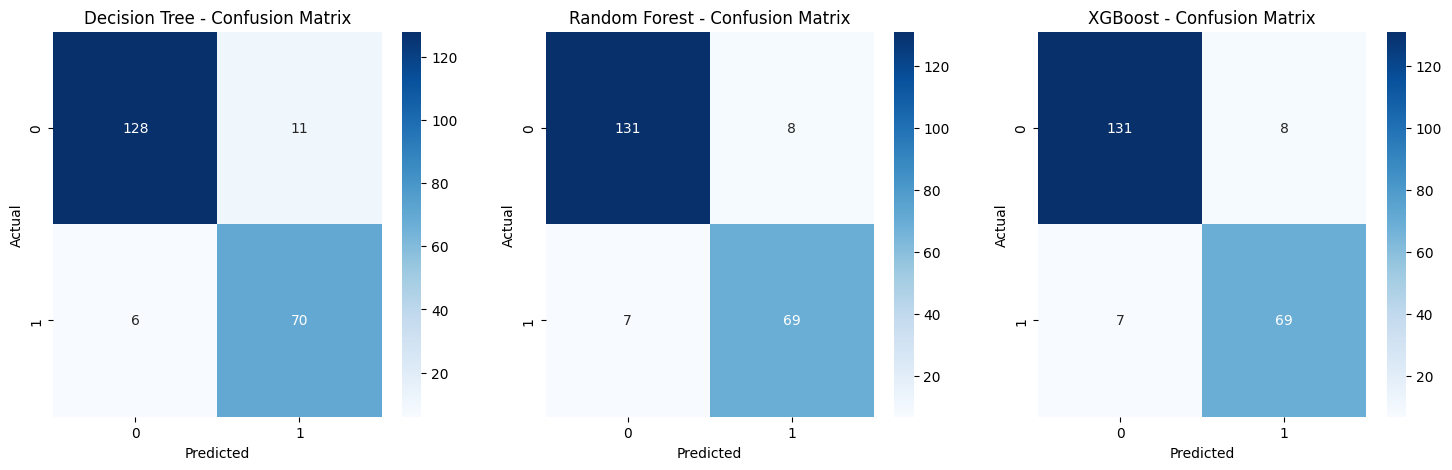

               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.920930   0.864198  0.921053  0.891720
Random Forest  0.930233   0.896104  0.907895  0.901961
XGBoost        0.930233   0.896104  0.907895  0.901961


In [54]:
# Plot all confusion matrices in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    sns.heatmap(conf_matrices[i], annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'{model_names[i]} - Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.show()

# Display evaluation metric comparisons
comparison_df = pd.DataFrame(results)
print(comparison_df)

In [55]:
# Test accuracy
test_accuracy = accuracy_score(best_split['y_test'], y_pred)
print("\nImprovement from hyperparameter tuning: {:.2f}%".format(
    (test_accuracy - baseline_accuracy) * 100
))


Improvement from hyperparameter tuning: 1.40%


Accuracy of `Random Forest` has increased from 91.6% to 93.02% (1.4% increase) after hyperparameter tuning and also performs well across all metrics. Also `Random Forest` and `XGBoost` have exactly the same metrics which could be due to small test size of 215 in 10% split and cross-validation variance.

In our predictive case of Alzheimer's disease diagnosis, high recall is critical and we don't want to miss out patients who are actually affected. High precision also helps avoid false positives which can lead to unnecessary emotional distress and testing.

**Accuracy**

Highest are `Random Forest` & `XGBoost` (93.02%).
This indicates that both ensemble models correctly classified approximately 93% of the samples.
Decision Tree performs slightly lower but still strong with about 92%.

**Precision**

Again, `Random Forest` and `XGBoost` tie here with 89.61%.
Precision reflects the correctness of positive predictions and this is especially crucial if false positives are costly (e.g., misdiagnosing a non-Alzheimer's case as Alzheimer's).

**Recall**

Unlike other metrics, `Decision Tree` leads with a slightly higher recall 92.11% meaning it was a bit better at capturing all positive cases (fewer false negatives).
If we prioritizes not missing any true cases (e.g., early detection of Alzheimer’s), this matters.

**F1 Score (Balance of Precision and Recall)**

`Random Forest` and `XGBoost` both slightly outperform the `Decision Tree` here (90.20% vs. 89.17%).
This means both models strike a better balance between identifying true positives and minimizing false positives.

### 5.1 Feature Importance
Use the `plot_importance` function to inspect the most important features of the final model.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

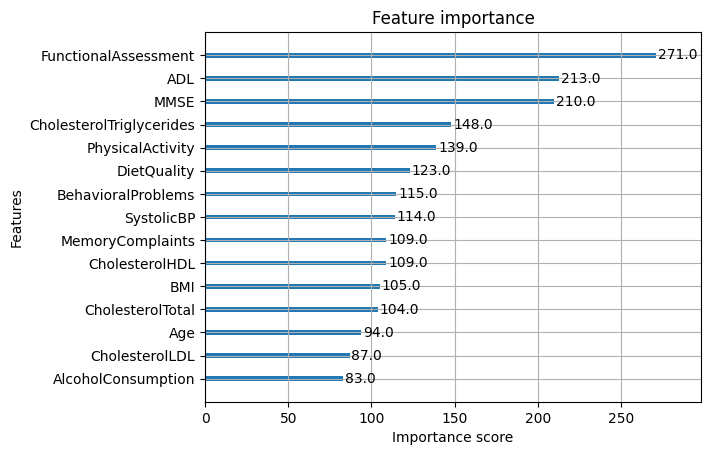

In [58]:
# Plot the top 15 feature importances
plot_importance(best_model, max_num_features=15)

#### 5.2 Top Features for Alzheimer's Disease Diagnosis

After training and evaluating multiple machine learning models, feature importance analysis from the best-performing model (`XGBoost`) identified as seen in the above graph as the top 15 features contributing to the diagnosis of Alzheimer’s disease. These features capture cognitive performance, functional ability, behavioral patterns and lifestyle-related factors and all of which are known to play significant roles in the onset and progression of Alzheimer’s.

#### 5.3 Top 3 Most Important Features

**Functional Assessment**
This evaluates an individual’s ability to perform tasks essential for daily living such as cooking, managing finances, hygiene. Functional decline often accompanies cognitive deterioration making this a vital marker for distinguishing between normal aging and dementia.

**ADL (Activities of Daily Living)**
This measures basic self-care activities such as bathing, dressing, eating. ADL impairment is frequently seen in patients with moderate to severe Alzheimer's helping to assess the impact of the disease on a person’s independence.

**MMSE (Mini-Mental State Examination)**
This is a widely used cognitive test that evaluates memory, attention, language and visual-spatial skills. Its prominence in the model reflects its clinical importance and cognitive decline is a core indicator of Alzheimer’s disease. A lower MMSE score typically correlates with more severe cognitive impairment.

Other important factors are Behavioral Problems, Diet Quality, Memory Complaints, Physical Activity, Sleep Quality, Cholesterol Triacylglycerides and BMI. The combination of these cognitive, behavioral and biological factors reflect a comprehensive approach to predicting Alzheimer’s disease and enhances the model’s interpretability and diagnostic relevance.

#### 5.4 Considerations for Feature Engineering

Feature engineering can enhance predictive performance by creating new variables based on domain knowledge. Rebuilding the model with refined or combined predictors may reduce noise and improve accuracy in diagnosing Alzheimer’s disease.

## 6. Conclusions

In this study, multiple machine learning models such as `Decision Tree`, `Random Forest` and `XGBoost` were evaluated for their effectiveness in classifying Alzheimer’s disease. Among them, `Random Forest` and `XGBoost` models outperformed `Decision Tree` across all metrics except for a slight edge in recall by Decision Tree. Given their superior F1 scores and precision, either Random Forest or XGBoost would be a strong candidate for hyperparameter tuning and deployment.

Key features such as `MMSE`, `Functional Assessment` and `ADL` were consistently identified as the most important predictors aligning with real-world clinical expectations. This demonstrates that the model effectively captures meaningful signals in the data.

Additionally, hyperparameter tuning played a crucial role in optimizing each model’s performance allowing for more accurate and generalizable predictions. The use of tree-based models also reduced the need for extensive data preprocessing to streamline the workflow.

Finally, feature engineering offers a valuable opportunity to further enhance model accuracy. Creating new features or refining existing ones—especially with clinical insights could significantly boost predictive power and reduce noise.

## References

1. El Kharoua, R. (2024) Alzheimer's Disease Dataset. Kaggle. Available at: https://www.kaggle.com/dsv/8668279 (DOI: 10.34740/KAGGLE/DSV/8668279) (Accessed: 10 April 2025).
2. Scheltens, P., De Strooper, B., Kivipelto, M., Holstege, H., Chételat, G., Teunissen, C.E., Cummings, J. and van der Flier, W.M. (2021). Alzheimer's disease. The Lancet, 397(10284), pp.1577-1590.
3. Müller, A.C. and Guido, S. (2017) Introduction to Machine Learning with Python: A Guide for Data Scientists. O'Reilly Media.
4. Geekshub Pvt. Ltd. (2019) Machine Learning with Real World Projects. Packt Publishing.
5. Hossain, R. and Timmer, D. (2021). Machine learning model optimization with hyper parameter tuning approach. Glob. J. Comput. Sci. Technol. D Neural Artif. Intell, 21(2), p.31.
6. DataCamp (2025) Decision tree classification with Python. DataCamp. Available at: https://www.datacamp.com/community/tutorials/decision-tree-classification-python (Accessed: 10 April 2025).
7. Google. (n.d.) Google Advanced Data Analytics Professional Certificate. Coursera.